# <center>IFT6758  TP1</center>

<center>Jinfang Luo(20111308), Ying Xiao(20111402), Yan Ai(20027063), Yunhe Li(20137167)</center>

<center>November 11, 2018<center>


# 1. Introdution

This homework proposes the similarity concept used on various algorithms with MNIST dataset. Our goal is to increase and compare the performance of various algorithms under two different similarity, one is Euclidean distance, another one is our original notion of similarity. 

The learning algorithms including supervised learning algorithm KNN, unsupervised learning algorithm K-medoid and Binary partition. PCoA and Isomap are manifold learning for dimensionality reduction.


# 2. Analyze the data

### 2.1 Import the data set

In [1]:
# Verify that sklearn is properly installed by running this cell
import csv
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns
from subprocess import check_output
import random
%matplotlib inline


From the data information, the training set includes 60000 data and the test set includes 10000 data. With 784 dimension contains 28x28 pixels figure. The first column is the label, indicates the handwrite number of the pixels. The handwrite number is from 0 to 9. It means for classification problem, the task is to classify into 10 different categories.

For the whold data set, each label contains 784 pixels, and average more than 600 equals to 0, we could mark this data set as sparse data set.

In [2]:
train_data_path = 'mnist_train.csv'
with open(train_data_path, 'r') as f_train:
    reader_train = csv.reader(f_train, delimiter=',')
    # get header from first row
    headers_train = next(reader_train)
    # get all the rows as a list
    train_data = list(reader_train)
    # transform data into numpy array
    train_data = np.array(train_data).astype(float)
    train_data_set = train_data[:,1:]
    train_target_set = train_data[:,0]
    
test_data_path = 'mnist_test.csv'
with open(test_data_path, 'r') as f_test:
    reader_test = csv.reader(f_test, delimiter=',')
    # get header from first row
    headers_test = next(reader_test)
    # get all the rows as a list
    test_data = list(reader_test)
    # transform data into numpy array
    test_data = np.array(test_data).astype(float)
    test_data_set_o = test_data[:,1:]
    test_target_set_o = test_data[:,0]

label = np.unique(train_target_set)
print("Handwriting Label: ", label)

d = train_data_set.shape[1] #784
n = train_data_set.shape[0]

dt = test_data_set_o.shape[1]
nt = test_data_set_o.shape[0]

def count_zero(n,d):
    c = [0]*n
    number_zero = 0
    for i in range(n):
        c[i] = 0
        for j in range(d):
            if train_data_set[i,j] == 0:
                c[i] += 1
        number_zero = number_zero + c[i]
    sum_zero = number_zero/n
    return sum_zero

zero_train = count_zero(n, d) 
zero_test = count_zero(nt, dt)
    
print(" ========= Training Set Info ========= ")
print("There are ", train_data_set.shape[0], "data in training set.")
print("There are ", train_data_set.shape[1], "pixels for each label.")
print("Each label has average", int(zero_train), "pixel value equals 0.")

print()
print(" ========= Testing Set Info ========= ")
print("There are ", test_data_set_o.shape[0], "data in training set.")
print("There are ", test_data_set_o.shape[1], "pixels for each label.")
print("Each label has average", int(zero_test), "pixel value equals 0.")

Handwriting Label:  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 ========= Training Set Info ========= 
There are  60000 data in training set.
There are  784 pixels for each label.
Each label has average 634 pixel value equals 0.

 ========= Testing Set Info ========= 
There are  10000 data in training set.
There are  784 pixels for each label.
Each label has average 633 pixel value equals 0.


From below figure, it shows the number for each label of classification is average, the data used for our learning algorithm is suitable.

Counter({1.0: 1127, 7.0: 1070, 3.0: 1032, 6.0: 1014, 0.0: 1001, 2.0: 991, 4.0: 980, 9.0: 978, 8.0: 944, 5.0: 863})


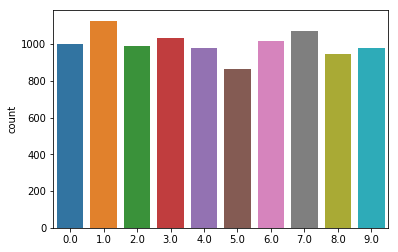

In [3]:
# set training set to 6000 samples   
train_data_set = train_data_set[:10000]
train_target_set = train_target_set[:10000]   

z_train = Counter(train_target_set)
print(z_train)

sns.countplot(train_target_set)


Counter({1.0: 126, 2.0: 116, 4.0: 110, 3.0: 107, 7.0: 99, 9.0: 94, 8.0: 89, 5.0: 87, 6.0: 87, 0.0: 85})


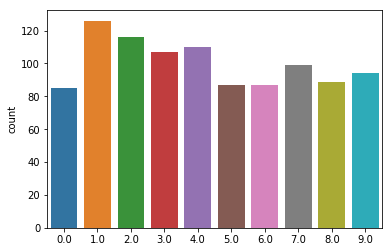

In [4]:
# set testing set to 1000 samples
test_data_set = test_data_set_o[:1000]
test_target_set = test_target_set_o[:1000] 

z_test = Counter(test_target_set)
print(z_test)

sns.countplot(test_target_set)


### 2.2 Data Preprocessing

According to the above analysis, we would choose Scaling sparse data as our data preprocessing method. It scales each feature by its maximum absolute value and the range is between [-1, 1]. 

After preprocessing the data based on 60000 training data. It shows that preprocessing data could help to speed up the calculate of the similarity. In the case of large amounts of data, this improvement could be more obvious.

In [5]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from time import time

X = train_data_set

max_abs_scaler = preprocessing.MaxAbsScaler()
X_scaled = max_abs_scaler.fit_transform(X)

k_value = 15
knn = KNeighborsClassifier(n_neighbors=k_value, metric='euclidean', p=2)
t0 = time()
knn.fit(X, train_target_set)
tx = time()-t0
print("The time use for calculating the similarity by KNN method: ", tx)

t1 = time()
knn.fit(X_scaled, train_target_set)
tx_scaled = time() - t1
print("The time use for calculating the similarity by KNN method(scaling data): ", tx_scaled)

The time use for calculating the similarity by KNN method:  0.5133171081542969
The time use for calculating the similarity by KNN method(scaling data):  0.4916260242462158


### 2.3 Normalization

"Normalizaing" often refers to rescaling by the minimum and range of the vector, to make all the elements lie between 0 and 1. From the figure we shows below, after normalizing the data, it won't change the similarity. 

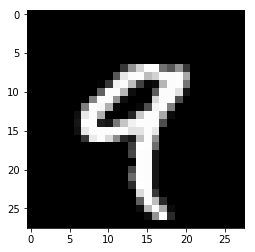

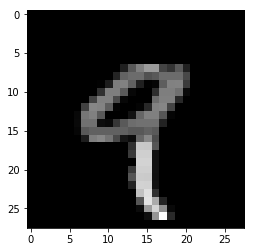

In [6]:
X = train_data_set[4].reshape((28,28))
X_normalized = preprocessing.normalize(X,  norm='l2')

def show(img):
    plt.imshow(img, cmap="gray", interpolation='nearest')

plt.figure()
show(X)

plt.figure()
show(X_normalized)


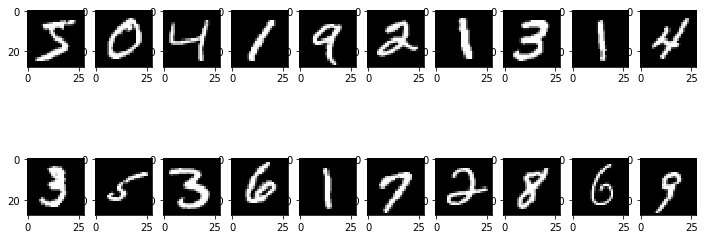

 ===== After Normalizaing ===== 


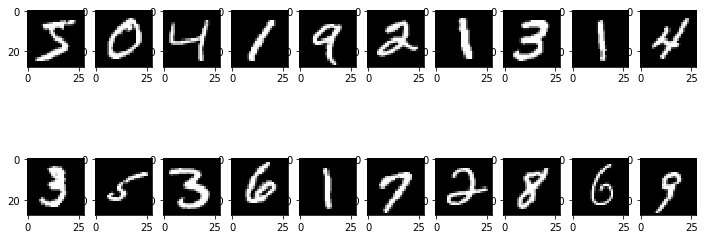

In [7]:
%matplotlib inline
# preview the images first
plt.figure(figsize=(12,5))
x, y = 10, 2
for i in range(20):  
    plt.subplot(y, x, i+1)
    plt.imshow(train_data_set[i].reshape((28,28)), cmap="gray", interpolation='nearest')
plt.show()

print(" ===== After Normalizaing ===== ")
X_normalized = preprocessing.normalize(train_data_set,  norm='l2')

plt.figure(figsize=(12,5))
x, y = 10, 2
for i in range(20):
    plt.subplot(y, x, i+1)
    plt.imshow(X_normalized[i].reshape((28,28)), cmap="gray", interpolation='nearest')
plt.show()

# 3. Performance of various algorithms

We classified the task of learning to 3 categories: Classification, regression and density estimation. Classification and regression problem belongs to supervised learning. Density estimation belongs to Non-supervised learning. Here we choose 5 various algorithms to compary the performance with different similarity definition and provide our analyst on these algorithms.

### 3.1 KNN

KNN is a lazy learning algorithm. During the training phase, it stores all the training points. It's non-parameter algorithm. 'k' is the hyper parameter, for voting by k closest neighbors. We calculated the distance between samples, to measure k closest neighbors and mark the label for each group by majority voting. 

We choose 10000 training data set and 1000 testing data set. We would compare the accuracy the performance between two different similarities. One is Euclidean distance, another one is our defined similarity. 

Before performing the training and predict our classifier with different distance definition, we preprocessing the data, but not normalize the data. After normalizing the data, we found the performance under two different definition is not obviously. That may because for normalizing the data, the 'l2' norm default to use to normalize each non zero samples. And our notion of similarity changed the distance calculation method.

In [8]:
n_train = 10000
np.random.seed(2)
inds = np.arange(n_train)
np.random.shuffle(inds)

train_inds = inds[:n_train]

X_train_knn = train_data_set[train_inds,:] 
y_train_knn = train_target_set[train_inds]

X_test_knn = test_data_set[:100]
y_test_knn = test_target_set[:100]

# Scaling the data
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_knn = max_abs_scaler.fit_transform(X_train_knn)
X_test_knn = max_abs_scaler.fit_transform(X_test_knn)

'''
# Normalize the data, no obvious result during comparing the performance.
# Choose not normalize the data
X_train_knn = preprocessing.normalize(X_train_knn,  norm='l2')
X_test_knn = preprocessing.normalize(X_test_knn,  norm='l2')
'''

"\n# Normalize the data, no obvious result during comparing the performance.\n# Choose not normalize the data\nX_train_knn = preprocessing.normalize(X_train_knn,  norm='l2')\nX_test_knn = preprocessing.normalize(X_test_knn,  norm='l2')\n"

The distance calculates by Euclidean distance is to find the closest/most similar k neighbors. There are several methods to calculate the distance, such as Manhattan, Cosine pseudo-distance. Euclidean distance value is more small, two samples are more similar.

While cosine similarity is between -1 and 1. -1 means the two samples are totally different. 1 means they are the same. So we use cosine distance = 1 - cosine_similarity to indicate the similarity. if cosine_distance value is more small, two samples are more similar.

So we combine the two methods to recalculate the distance of two samples.

Euclidean distance = $\sqrt{(b_1-a_1)^2 + (b_2-a_2)^2 + ... + (b_{784}-a_{784})^2}$

Cosine distance = 1 - cosine similarity = $ 1 - \frac{a*b}{||a||*||b||}$

Our notion of similarity = Euclidean distance * Cosine distance

In [9]:
def mydist(x,y):
    euc = np.sqrt(np.sum((x-y)**2))
    z = np.dot(x,y)/(np.dot(x,x)**0.5*np.dot(y,y)**0.5)
    return euc*(1-z)

def mydist1(x,y):
    euc = np.sqrt(np.sum((x-y)**2))
    z = np.dot(x, y)
    return euc/z

In [10]:
# KNN model
#http://sklearn.apachecn.org/cn/0.19.0/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric
from sklearn.neighbors import KNeighborsClassifier

k_value_euc = -1
small_err_euc = 1
ks_euc = []
errs_euc = []
for k_euc in range(5,20):
    neigh_euc = KNeighborsClassifier(n_neighbors=k_euc, metric='euclidean', p=2)
    neigh_euc.fit(X_train_knn, y_train_knn)
    test_pred_euc = neigh_euc.predict(X_test_knn)
    err_euc = 1 - np.mean(test_pred_euc == y_test_knn)
    ks_euc.append(k_euc)
    errs_euc.append(err_euc)
    if err_euc < small_err_euc:
        small_err_euc = err_euc
        k_value_euc = k_euc
print("=== With Euclidean distance ===")
print("The accuracy is {:.2f}%".format(100.0 * (1-small_err_euc)))# k=1000, 31.3% (n_sample=10000); k=100, 61.5% (n_sample=1000)
print("The k neighbors we choose: ", k_value_euc)

=== With Euclidean distance ===
The accuracy is 97.00%
The k neighbors we choose:  13


In [12]:
k_value_sim = -1
small_err_sim = 1
ks_sim = []
errs_sim = []
for k_sim in range(5,20):
    neigh_sim = KNeighborsClassifier(n_neighbors=k_sim, metric=mydist)
    neigh_sim.fit(X_train_knn, y_train_knn)
    #print(neigh.score(test_data_set[:100], test_target_set[:100]))
    test_pred_sim = neigh_sim.predict(X_test_knn)
    err_sim = 1 - np.mean(test_pred_sim==y_test_knn)
    ks_sim.append(k_sim)
    errs_sim.append(err_sim)
    if err_sim < small_err_sim:
        small_err_sim = err_sim
        k_value_sim = k_sim
print("=== With Our notion of similarity ===")
print("The accuracy is {:.2f}%".format(100.0 * (1 - small_err_sim)))
print("The k neighbors we choose: ", k_value_sim)

=== With Our notion of similarity ===
The accuracy is 99.00%
The k neighbors we choose:  19


We choose the hyper parameter 'k' from 5 to 20, from below figure, the performance by using our notion of similarity is better than using Euclidean distance.

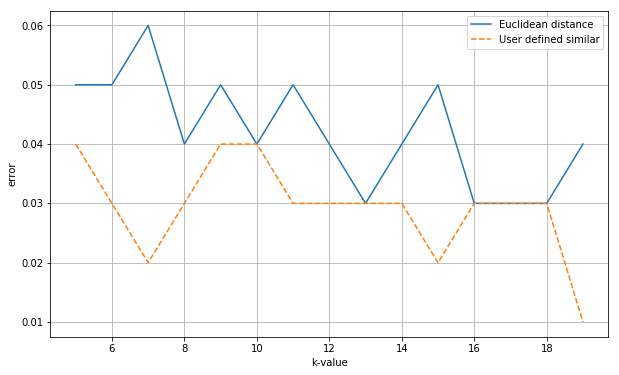

In [13]:
plt.figure(figsize=(10,6))
plt.plot(ks_euc, errs_euc, '-')
plt.plot(ks_sim, errs_sim, '--')
plt.xlabel('k-value')
plt.ylabel('error')
plt.grid()
plt.legend(('Euclidean distance', 'User defined similar'))
plt.show()

### 3.2 K-medoids

K-medoids is a special type of k-means algorithm. It's clustering algorithm and unsupervised learning method. The difference between k-means and k-medoids is, the cluster center of k-medoids is one of the sample as k-means would return a new center position for each clustering type. 

For unsupervised learning method, there is no concept of training set and test set. We choose 1000 samples from test set. Also K-medoids is clustering algorithm, so accuracy is not suitable for evaluating the performance. But there are some methods to evaluate clustering performance. Such as Rand index, Mutual information based scores. Here we would use V-measure score. Because V-measure labeling given a ground truth. This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way. Actually we can get the true labels, so we would choose this score as our evaluation method.

In [14]:
n = 1000
np.random.seed(2)
inds = np.arange(n)
np.random.shuffle(inds)

cluster_inds = inds[:n]

X_cluster = test_data_set[cluster_inds,:] 
y_cluster = test_target_set[cluster_inds]

# Scaling the data
max_abs_scaler = preprocessing.MaxAbsScaler()
X_cluster = max_abs_scaler.fit_transform(X_cluster)

After comparing the performance of two distance definition. The score of k-medoids is 0.28, using our notion of similarity, the score raises to 0.33. 

In [15]:
from pyclustering.cluster.kmedoids import kmedoids
from sklearn import metrics
from sklearn.neighbors import DistanceMetric
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics.cluster import v_measure_score

medoids = [0,1,2,3,4,5,6,7,8,9]
dist_euc = euclidean_distances(X_cluster)
kmedoids_euc = kmedoids(dist_euc, medoids, data_type='distance_matrix')
kmedoids_euc.process()
clusters_euc = kmedoids_euc.get_clusters()


# pred_cluster: assign cluster number for each cluster
def pred_cluster(cluster, data):
    l = len(cluster)
    n = data.shape[0]
    pred_label = [1] * n
    for i in range(l):
        ll = len(cluster[i])
        for j in range(ll):
            k = cluster[i][j]
            pred_label[k] = i
    return pred_label

pred_label_euc = pred_cluster(clusters_euc, X_cluster)
euc_score = metrics.v_measure_score(y_cluster, pred_label_euc)
print('The v_measure score(Euclidean distance): %.2f' %euc_score)

dist_cos = cosine_distances(X_cluster)
mydist = dist_euc * dist_cos

kmedoids_mydist = kmedoids(mydist, medoids, data_type='distance_matrix')
kmedoids_mydist.process()
clusters_mydist = kmedoids_mydist.get_clusters()
pred_label_mydist = pred_cluster(clusters_mydist, X_cluster)
mydisc_score = metrics.v_measure_score(y_cluster, pred_label_mydist)
print()
print('The v_measure score(With Our notion of similarity): %.2f' %mydisc_score)

The pyclustering core is not supported for platform 'darwin' (64bit).
Please, contact to 'pyclustering@yandex.ru'.
The v_measure score(Euclidean distance): 0.28

The v_measure score(With Our notion of similarity): 0.33


### 3.3 Binary partition (Hierarchical clustering)

Binary partition is a clustering algorithm, it will combine two closest group, at last classify to user defind cluster. It's also a unsupervised learning method. We would use the same data set as k-medoids and V-measure score to evaluate the performance between different distance/similar definition.

In [16]:
print(X_cluster.shape)
print(y_cluster.shape)

(1000, 784)
(1000,)


After comparing the performance of two distance definition. The score of binary partition is 0.28, using our notion of similarity, the score raises to 0.54. 

In [17]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

n_samples, n_features = X_cluster.shape
n_digits = len(np.unique(y_cluster))

bp_cluster_euc = AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=10).fit(X_cluster)
bp_pred_label_euc = bp_cluster_euc.labels_
bp_euc_score = metrics.v_measure_score(y_cluster, bp_pred_label_euc)
print('The v_measure score(Euclidean distance): %.2f' %bp_euc_score)

dist_euc = euclidean_distances(X_cluster)
dist_cos = cosine_distances(X_cluster)
mydist = dist_euc * dist_cos

bp_cluster_mydist = AgglomerativeClustering(affinity='precomputed', linkage='average', n_clusters=10).fit(mydist)
bp_pred_label_mydist = bp_cluster_mydist.labels_
bp_mydist_score = metrics.v_measure_score(y_cluster, bp_pred_label_mydist)
print()
print('The v_measure score(With Our notion of similarity): %.2f' %bp_mydist_score)

The v_measure score(Euclidean distance): 0.28

The v_measure score(With Our notion of similarity): 0.54


### PCoA

Our data set contains large dimensionality (784 dimensions). Because of the curse of dimension, it's necessary to perform the dimension reduction. PCoA and isomap are two methods to reduce the dimension. 

PCA(Principal Component Analysis) and PCoA(Principal Component Analysis) are similar. But in PCA we used original matrix, but PCoA we use the distance matrix.  After reduce the dimension, we choose KMeans to calculate the predict labels and use v measure score to evaluate the performance between two different distance definition.

Comparing the performance of two distance definition. The score of PCoA with Euclidean distance is 0.33, using our notion of similarity, the score raises to 0.41.


The v_measure score(Euclidean distance): 0.33


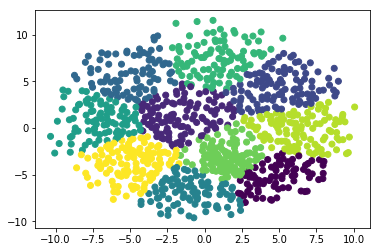

In [18]:
from sklearn import metrics
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_distances
from sklearn.cluster import KMeans

X = X_cluster
y = y_cluster

dist_euc = euclidean_distances(X)

embedding = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
X_tran_euc = embedding.fit_transform(dist_euc)
y_mds_euc = KMeans(n_clusters=10).fit_predict(X_tran_euc)
plt.scatter(X_tran_euc[:, 0], X_tran_euc[:, 1], c=y_mds_euc)

pcoa_euc_score = metrics.v_measure_score(y_cluster, y_mds_euc)
print()
print('The v_measure score(Euclidean distance): %.2f' %pcoa_euc_score)


The v_measure score(With Our notion of similarity): 0.41


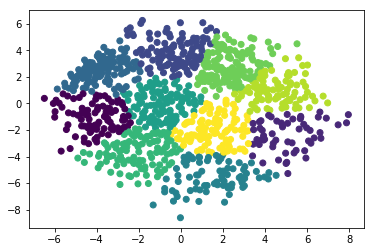

In [19]:
from sklearn.metrics.pairwise import cosine_distances

dist_cos = cosine_distances(X)
mydist = dist_euc*dist_cos
#print(mydist.shape)

X_tran_mydist = embedding.fit_transform(mydist)
y_mds_mydist = KMeans(n_clusters=10).fit_predict(X_tran_mydist)
plt.scatter(X_tran_mydist[:, 0], X_tran_mydist[:, 1], c=y_mds_mydist)

pcoa_mydist_score = metrics.v_measure_score(y_cluster, y_mds_mydist)
print()
print('The v_measure score(With Our notion of similarity): %.2f' %pcoa_mydist_score)

### Isomap

Comparing the performance of two distance definition. The score of Isomap with Euclidean distance is 0.34, using our notion of similarity, the score raises to 0.39.

Computing Isomap embedding

The v_measure score(Euclidean distance): 0.34


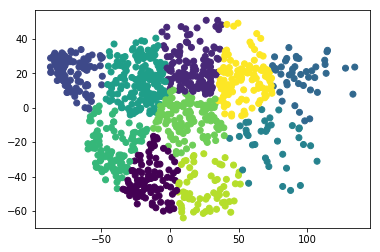

In [20]:
from sklearn.manifold import Isomap

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_distances

X = X_cluster
y = y_cluster

dist_euc = euclidean_distances(X)

n_neighbors = 30
# Isomap projection of the digits dataset
print("Computing Isomap embedding")
embedding_isomap_euc = Isomap(n_neighbors, n_components=2).fit_transform(dist_euc)
y_iso_euc = KMeans(n_clusters=10).fit_predict(embedding_isomap_euc)
plt.scatter(embedding_isomap_euc[:,0], embedding_isomap_euc[:,1], c=y_iso_euc)

isomap_euc_score = metrics.v_measure_score(y_cluster, y_iso_euc)
print()
print('The v_measure score(Euclidean distance): %.2f' %isomap_euc_score)

Computing Isomap embedding

The v_measure score(With Our notion of similarity): 0.39


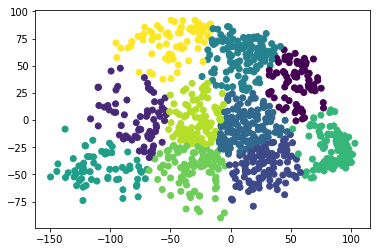

In [21]:
dist_cos = cosine_distances(X)
mydist = dist_euc*dist_cos
#print(mydist.shape)

n_neighbors = 30
# Isomap projection of the digits dataset
print("Computing Isomap embedding")

embedding_isomap_mydist = Isomap(n_neighbors, n_components=2).fit_transform(mydist)
y_iso_mydist = KMeans(n_clusters=10).fit_predict(embedding_isomap_mydist)
plt.scatter(embedding_isomap_mydist[:,0], embedding_isomap_mydist[:,1], c=y_iso_mydist)

isomap_mydist_score = metrics.v_measure_score(y_cluster, y_iso_mydist)
print()
print('The v_measure score(With Our notion of similarity): %.2f' %isomap_mydist_score)

# 4. Learning representations using convolutional neural networks

In this section, we use a convolutional neural network to learn new representations for the original data. The algorithms will perform in the new feature space instead of the original pixel space. We can see that the performance is higher in the new feature space than that in the original pixel space.

Specifically, we compute the similarity between 2 data points $\bf{x_i}$ and $\bf{x_j}$ as follows:

$\text{d}(\bf{x_i}, \bf{x_j}) = \sqrt{(\Phi(\bf{x_i}) - \Phi(\bf{x_j}))^T (\Phi(\bf{x_i}) - \Phi(\bf{x_j}))}$

where $\Phi(\cdot)$ is the transformation of a convolutional neural network.

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
sess = tf.InteractiveSession()

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)
  
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')  
                        
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])
x_image = tf.reshape(x, [-1,28,28,1])
                        
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

W_fc2 = weight_variable([1024, 256])
b_fc2 = bias_variable([256])
h_fc2 = tf.nn.relu(tf.matmul(h_fc1, W_fc2) + b_fc2)

W_fc3 = weight_variable([256, 10])
b_fc3 = bias_variable([10])
y_conv=tf.nn.softmax(tf.matmul(h_fc2, W_fc3) + b_fc3)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_conv), reduction_indices=[1]))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

tf.global_variables_initializer().run()

for i in range(2000):
    batch = mnist.train.next_batch(100)
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1]})
        print("step %d, training accuracy %g"%(i, train_accuracy))
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})

print("test accuracy %g"%accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

embedding_test = h_fc2.eval(feed_dict={x: mnist.test.images})
np.savetxt('embedding_test', embedding_test, fmt='%f')
np.savetxt('labels_test', mnist.test.labels, fmt='%d')

'''
embedding_train = h_fc2.eval(feed_dict={x: mnist.train.images})
np.savetxt('embedding_train', embedding_train, fmt='%f')
np.savetxt('labels_train', mnist.train.labels, fmt='%d')
'''

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

"\nembedding_train = h_fc2.eval(feed_dict={x: mnist.train.images})\nnp.savetxt('embedding_train', embedding_train, fmt='%f')\nnp.savetxt('labels_train', mnist.train.labels, fmt='%d')\n"

## Test CNN defined matrix - on PCoA + KMeans


The v_measure score(Euclidean distance): 0.31


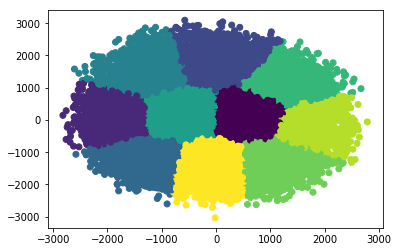

In [36]:
from sklearn import metrics
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_distances

X = test_data_set_o
y = test_target_set_o

dist_euc = euclidean_distances(X)

embedding = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
X_tran_euc = embedding.fit_transform(dist_euc)
y_mds_euc = KMeans(n_clusters=10).fit_predict(X_tran_euc)
plt.scatter(X_tran_euc[:, 0], X_tran_euc[:, 1], c=y_mds_euc)

pcoa_euc_score = metrics.v_measure_score(y, y_mds_euc)
print()
print('The v_measure score(Euclidean distance): %.2f' %pcoa_euc_score)


Computing MDS embedding

The v_measure score(With Our notion of similarity): 0.41


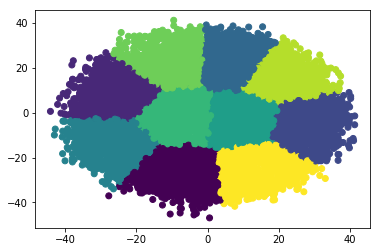

In [37]:
print("Computing MDS embedding")

compress_data = np.loadtxt('embedding_test')

clf = MDS(n_components=2, n_init=1, max_iter=100)
transform_mds = clf.fit_transform(compress_data)
y_pred_mds = KMeans(n_clusters=10).fit_predict(transform_mds)
plt.scatter(transform_mds[:,0], transform_mds[:,1], c=y_pred_mds)

mydist_score = metrics.v_measure_score(y, y_pred_mds)
print()
print('The v_measure score(With Our notion of similarity): %.2f' %mydist_score)

# 5. Conclustion

By preprocessing the data, we know the scaling and normalizing the data could help us on processing the data during training our learning method. Scaling data could increase the convergence speed. Normalizing data won't change the similarity. From the models we choose, we found normalizing data is not always bring the positive result, we choose scaling the data but not normalizing.

The performance is pretty good by using knn model, after using our notion of similar, the accuracy increase to 99%. As for clustering models, we compare k-medoids and binary partition. With Euclidean distance, the performance is not good on K-medoids and binary partition. With our notion of similarity, the performance is increased more in binary partition model. By recalculated the distance for deminsion reduction, our notion of similarity works better both in PCoA and isomap, perfromance increases more on PCoA than on Isomap.

Last we use convolutional neural network to learn new representations for the original data. The performance is higher in the new feature space to 98% 